In [1]:
import numpy as np
import matplotlib.pyplot as mt
from scipy.linalg import eigh_tridiagonal
import time

#Funciones utilizadas------------------------------------

#Diagonalización tridiagonales
def diagonalizar_tridiagonal_simetrica(diagonal_principal, diagonal_superior):
    # Calcular autovalores y autovectores
    autovalores, autovectores = eigh_tridiagonal(diagonal_principal, diagonal_superior, eigvals_only=False)
    return autovalores,autovectores

#Medir tiempo
start_time = time.time()
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time:.6f} segundos")

El tiempo de ejecución fue: 0.000040 segundos


In [2]:
#Utilizo directamente el código final que diseñé para la ev temporal
import matplotlib.pyplot as plt
start_time = time.time()
def energ_estados(N, h, K, eps):
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)

    # Matriz S_z
    S_z = np.diag(Ms)

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x
    S_x=1/2 * (S_mas + S_menos)

    # Hamiltoniano
    J = 1
    H = -(4 * J) / N * np.diag(Ms**2) - 2 * h * S_x + eps * S_z -(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms)

    # Diagonalización
    autoenergias, autovectores = np.linalg.eigh(H)
    return autoenergias, autovectores

def evolution_time(h0, hf,K0, Kf, eps0, eps1, t0, tf, p, N):
    energ1, auto1 = energ_estados(N, h0, K0, eps0)
    energ2, auto2 = energ_estados(N, hf, Kf, eps1)

    # Cambio de base
    U = auto2.T @ auto1

    # Estado inicial
    c = np.zeros((N + 1, 1))
    c[0] = 1
    d = U @ c

    # Precalculos
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)
    sz_matrix = np.tensordot(auto2.T, (Ms[:, None] * auto2), axes=([1], [0]))

    # Cálculo de S_z en función del tiempo
    energy_diff = energ2[:, None] - energ2[None, :]
    d_d_conj = np.outer(np.conjugate(d[:, 0]), d[:, 0])

    tp = np.linspace(t0, tf, p)
    S_zm = [
        np.sum(sz_matrix * np.exp(-1j * energy_diff * t) * d_d_conj).real / (N / 2)
        for t in tp
    ]

    plt.plot(tp, S_zm)
    plt.xlabel("t")
    plt.ylabel("M")
    plt.title(f"h0={h0} hf={hf} K0={K0} Kf={Kf} eps0={eps0} epsf={eps1}")
    plt.show()

#evolution_time(1.9, 2.1,0.2,0.2,1e-6, 1e-6, 0, 90, 100, 1000)
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time:.6f} segundos")

El tiempo de ejecución fue: 0.002343 segundos


Como podemos ver, en la transición de segundo orden la evolución temporal tras un quench es muy similar a la del sistema sin el término con K. Estudiemos a continuación que ocurre donde se sitúa la transición de fase de primer orden para $K_{c}$

In [22]:
#Sacamos K_c con la fórmula de Armando
def K_c_R(h):
    return (27*h**2 - 36*h - 4 + np.sqrt( (9*h-2)**3 * (h-2))) / (64*h)
h=2.5
print(f"El valor crítico para h= {h} K_c es {K_c_R(h)}")

El valor crítico para h= 2.5 K_c es 0.8773876464605419


Paramagnético a ferromagnético


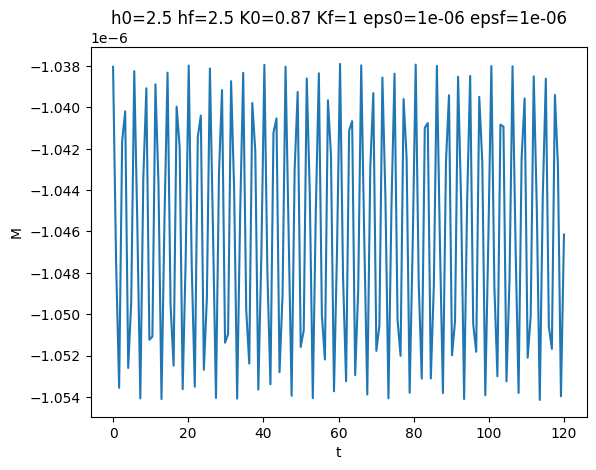

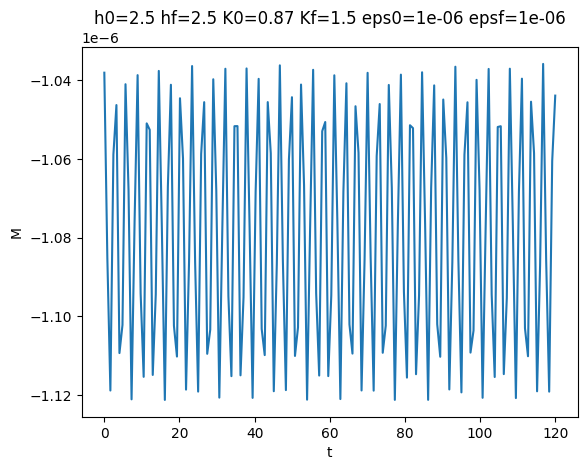

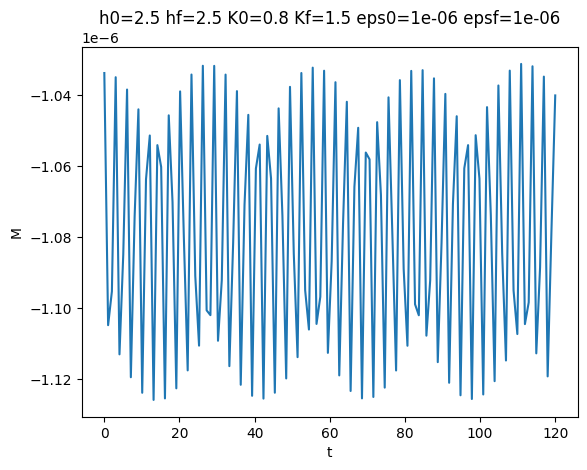

Ferromagnético a ferromagnético


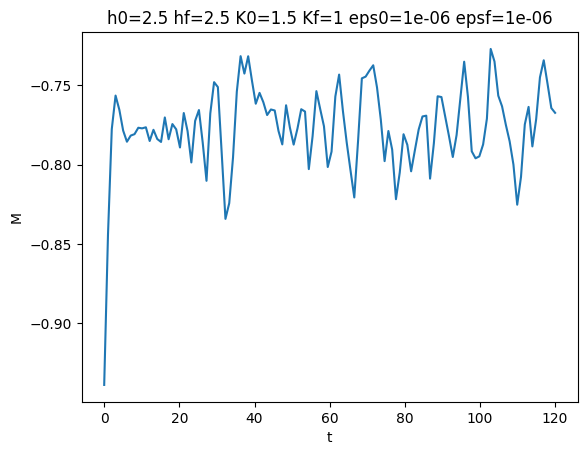

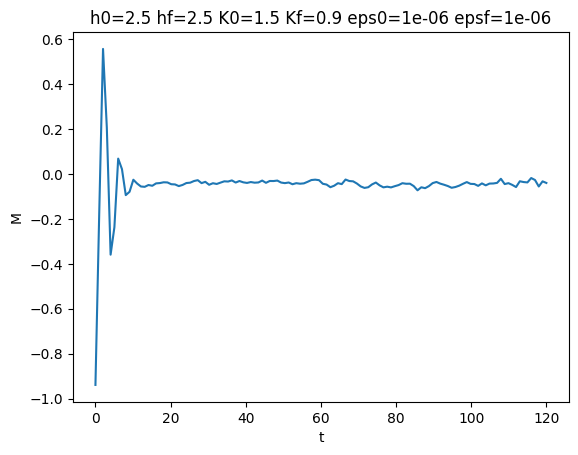

Ferromagnético a paramagnético


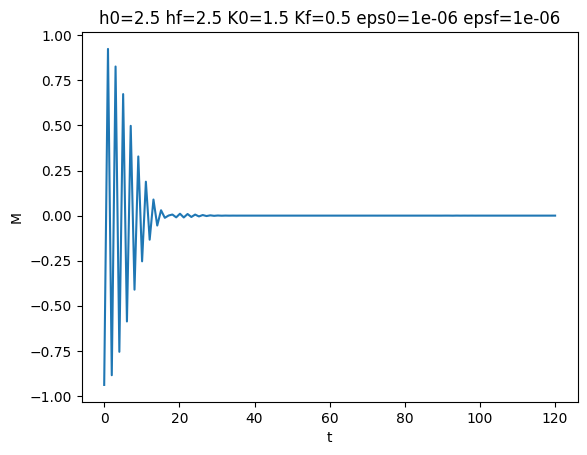

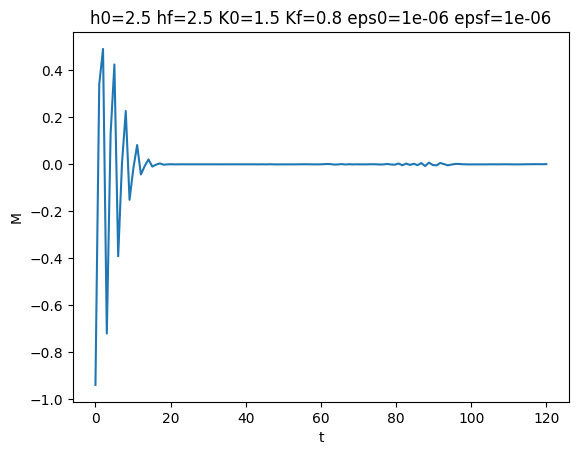

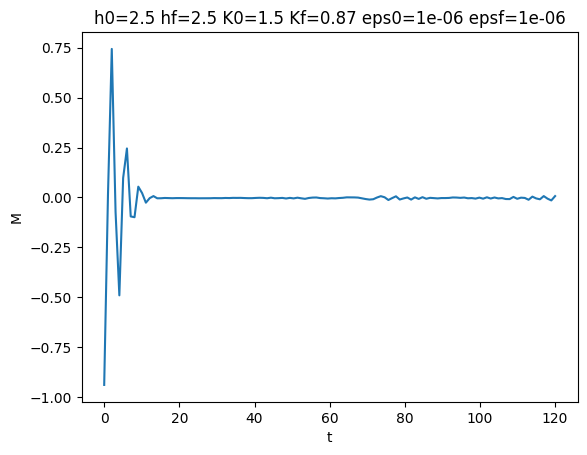

In [8]:
print("Paramagnético a ferromagnético")
evolution_time(2.5, 2.5,0.87,1,1e-6, 1e-6, 0, 120, 150, 1000)
evolution_time(2.5, 2.5,0.87,1.5,1e-6, 1e-6, 0, 120, 150, 1000)
evolution_time(2.5, 2.5,0.8,1.5,1e-6, 1e-6, 0, 120, 120, 1000)
print("Ferromagnético a ferromagnético")
#evolution_time(2.5, 2.5,1.5,1.1,1e-6, 1e-6, 0, 120, 120, 1000)
evolution_time(2.5, 2.5,1.5,1,1e-6, 1e-6, 0, 120, 120, 1000)
evolution_time(2.5, 2.5,1.5,0.9,1e-6, 1e-6, 0, 120, 120, 1000)
print("Ferromagnético a paramagnético")
#evolution_time(2.5, 2.5,1,0.87,1e-6, 1e-6, 0, 120, 150, 1000)
#evolution_time(2.5, 2.5,0.9,0.8,1e-6, 1e-6, 0, 120, 120, 1000)
evolution_time(2.5, 2.5,1.5,0.5,1e-6, 1e-6, 0, 120, 120, 1000)
evolution_time(2.5, 2.5,1.5,0.8,1e-6, 1e-6, 0, 120, 120, 1000)
evolution_time(2.5, 2.5,1.5,0.87,1e-6, 1e-6, 0, 120, 120, 1000)


# Distribución de energía

Obtenemos las distribuciones energéticas y las de magnetización cambiando de base nuestro estado fundamental del hamiltoniano inicial al nuevo.

In [22]:
def energ_estados(N, h,K, eps):
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)

    # Matriz S_z
    S_z = np.diag(Ms)

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x
    S_x=1/2 * (S_mas + S_menos)

    # Hamiltoniano
    J = 1
    H = -(4 * J) / N * np.diag(Ms**2) - 2 * h * S_x + eps * S_z -(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms)

    # Diagonalización
    autoenergias, autovectores = np.linalg.eigh(H)
    return autoenergias, autovectores

def distribucion_energias(N,h0,hf,K0,Kf,eps0,eps1):
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)
#Autovalores y autoestados en ambos hamiltonianos
    energ1, auto1 = energ_estados(N, h0,K0, eps0)
    energ2, auto2 = energ_estados(N, hf,Kf, eps1)

# Cambio de base
    U = auto2.T @ auto1

# Estado inicial
    c = np.zeros((N + 1, 1))
    c[0] = 1
    d = U @ c
    prob=np.abs(d)**2

#Magnetización
    magn=[]
    for i in range(int(N+1)):
        magn.append((auto2[:,i] @ (Ms*auto2[:,i]).T)*1/(N/2))
    plt.plot(energ2/N,prob,'.')
    plt.xlabel(r"$E_{n}$")
    plt.ylabel("Probability")
    plt.title(f"h0={h0} hf={hf} K0={K0} Kf={Kf} eps0={eps0} epsf={eps1}")
    plt.grid()
    plt.show()
    print(f"La máxima probabilidad se da para E_n = {energ2[np.argmax(prob)]/N}")

    plt.plot(magn,prob,'.')
    plt.xlabel(r"$M$")
    plt.ylabel("Probability")
    plt.title(f"h0={h0} hf={hf} K0={K0} Kf={Kf} eps0={eps0} epsf={eps1}")
    plt.grid()
    plt.show()
    print(f"La máxima probabilidad se da para M = {magn[np.argmax(prob)]}")
    return

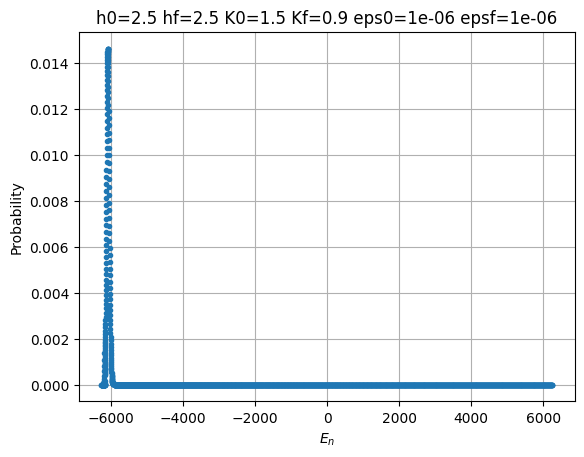

La máxima probabilidad se da para E_n = -6101.726239812913


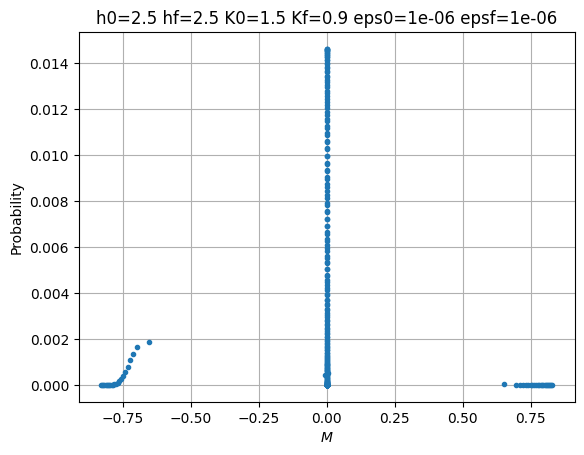

La máxima probabilidad se da para M = 1.2060181654296502e-06


In [16]:
distribucion_energias(2500,2.5,2.5,1.5,0.9,1e-6,1e-6)

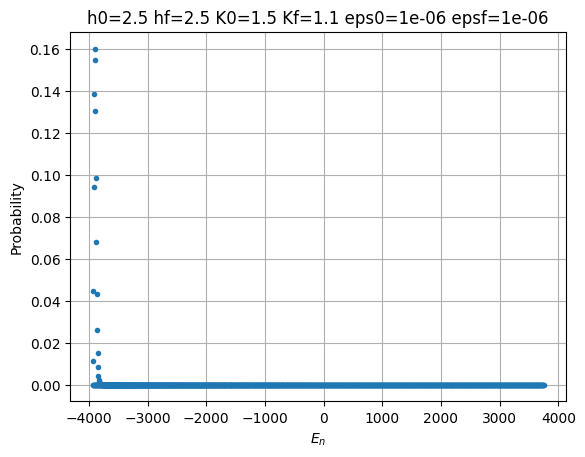

La máxima probabilidad se da para E_n = -3903.5899255913046


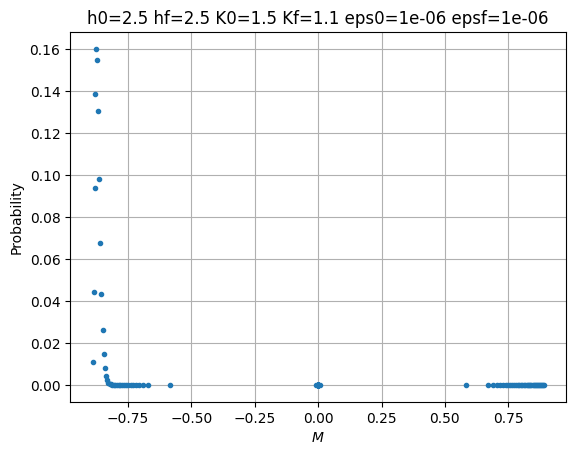

La máxima probabilidad se da para M = -0.8749360256738076


In [17]:
distribucion_energias(1500,2.5,2.5,1.5,1.1,1e-6,1e-6)

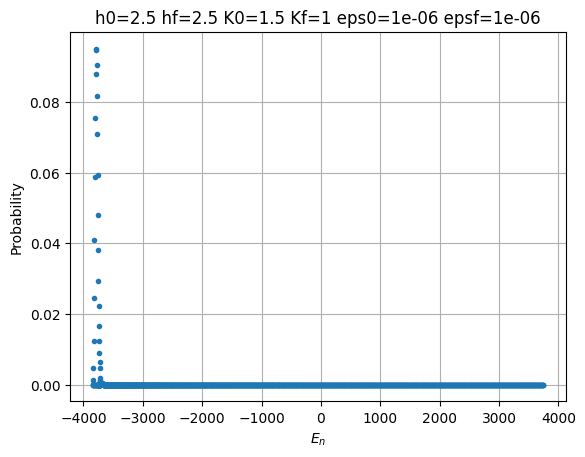

La máxima probabilidad se da para E_n = -3783.52295362863


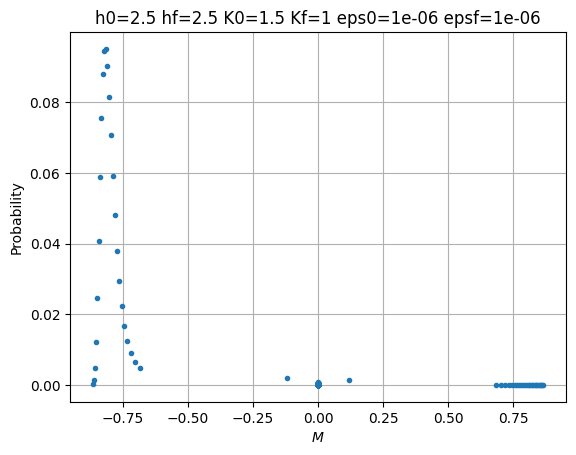

La máxima probabilidad se da para M = -0.8146105317634642


In [18]:
distribucion_energias(1500,2.5,2.5,1.5,1,1e-6,1e-6)

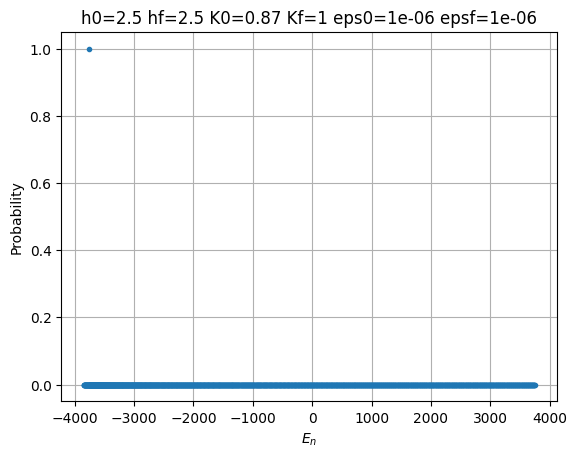

La máxima probabilidad se da para E_n = -3751.3909098910353


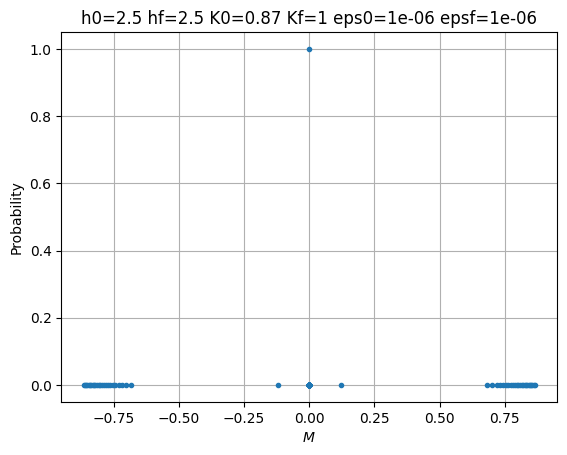

La máxima probabilidad se da para M = -1.0299778797357163e-06


In [19]:
distribucion_energias(1500,2.5,2.5,0.87,1,1e-6,1e-6)

En las distribuciones de energía, o más concretamente la representación de la probabilidad en función de la magnetización M, vemos que el sistema tiende en su evolución temporal hacia el estado con mayor probabilidad del espectro, lo que nos indica que es correcto.

Investiguemos un caso en concreto con variación de h y K. Partimos de dos estamos iniciales: h0=1.9, k0=0 y eps0=1e-6 ý h0=2.4, k0=0.8 y eps0=1e-6; y llegaremos a un estado final hf=5, kf=3 y epsf=0.

In [7]:
def K_c_R(h):
    return (27*h**2 - 36*h - 4 + np.sqrt( (9*h-2)**3 * (h-2))) / (64*h)

h=5
print(f"El valor crítico para h= {h} K_c es {K_c_R(h)}")
h=2.4
print(f"El valor crítico para h= {h} K_c es {K_c_R(h)}")

El valor crítico para h= 5 K_c es 3.060581617933823
El valor crítico para h= 2.4 K_c es 0.7812499999999999


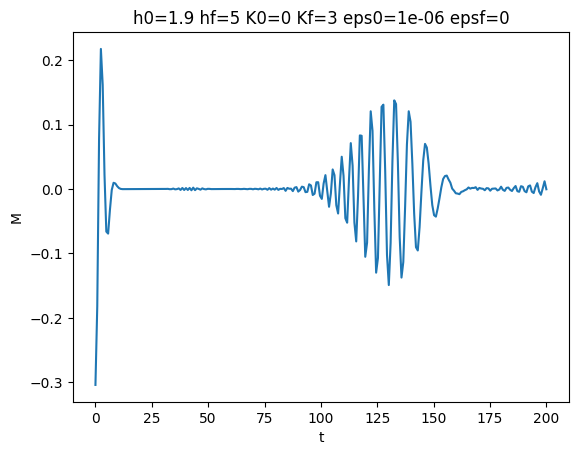

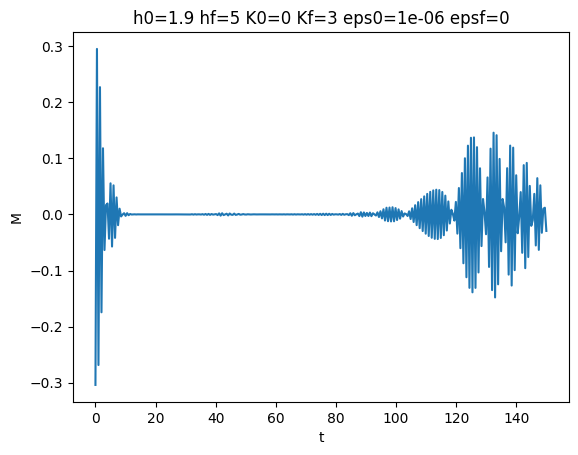

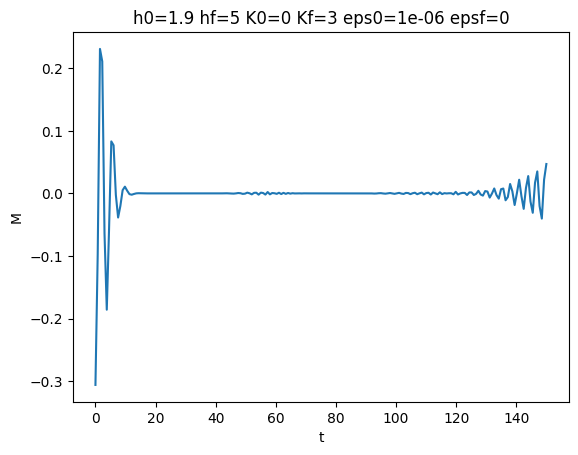

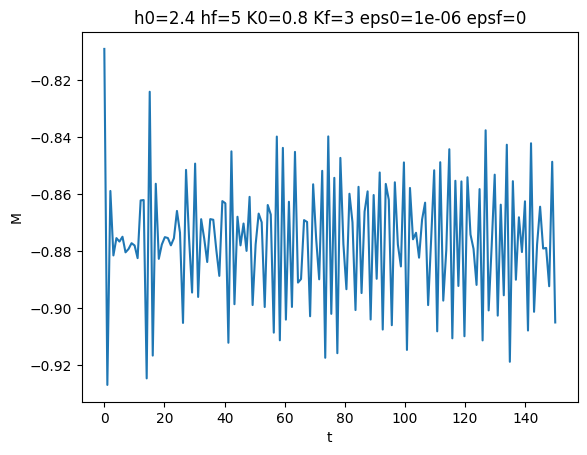

In [4]:


#1-----------------------------------------
#Partimos de un ferromagnetico y pasamo a un paramagnético en la frontera de la transición de fase de primer orden
evolution_time(1.9, 5,0,3,1e-6, 0, 0, 200, 250, 1500)
evolution_time(1.9, 5,0,3,1e-6, 0, 0, 150, 250, 1500)
evolution_time(1.9, 5,0,3,1e-6, 0, 0, 150, 200, 2000)
#2-------------------------------------------
#Partimos de un ferromagnetico y pasamos a un paramagnético en la frontera de la transición de fase de primer orden
evolution_time(2.4, 5,0.8,3,1e-6, 0, 0, 150, 150, 1000)

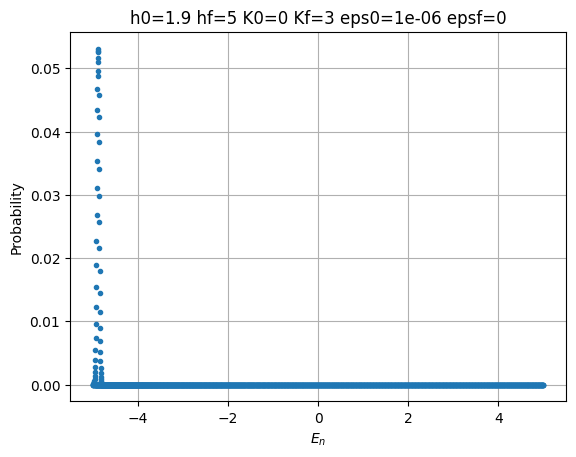

La máxima probabilidad se da para E_n = -4.881022274249474


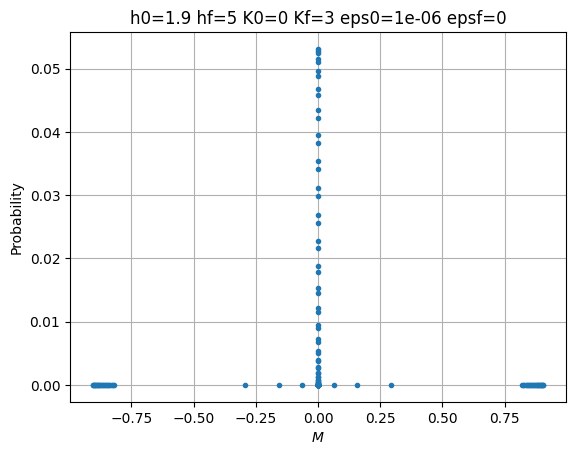

La máxima probabilidad se da para M = 2.3792336546415267e-14


In [23]:
distribucion_energias(2000,1.9, 5,0,3,1e-6, 0)

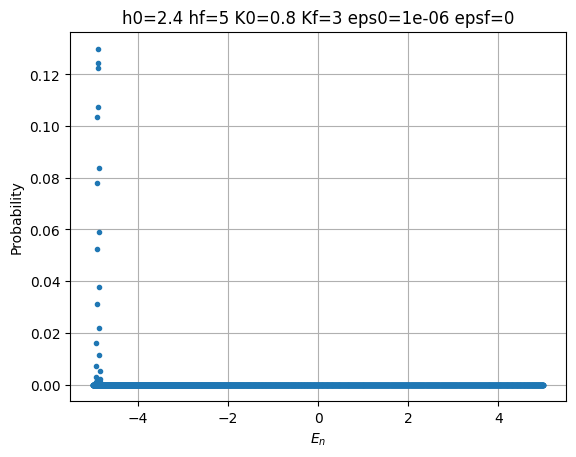

La máxima probabilidad se da para E_n = -4.883359254075646


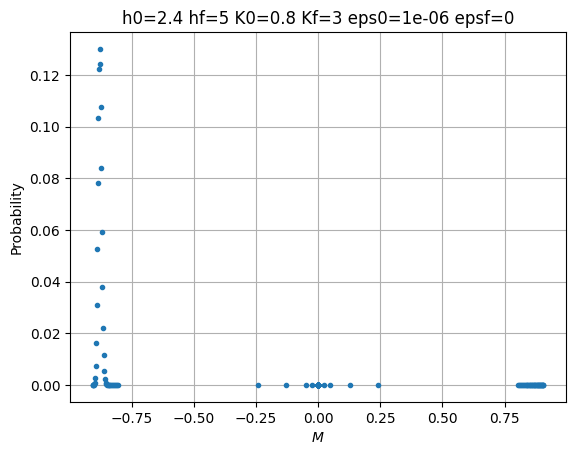

La máxima probabilidad se da para M = -0.8787100659724013


In [24]:
distribucion_energias(3000,2.4, 5,0.8,3,1e-6, 0)